In [1]:
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import import_ipynb
import common_functions

importing Jupyter notebook from common_functions.ipynb


## Functions (unique to this task)

In [2]:
def plot_silhouette_scores(silhouette_scores, lower_lim=2, upper_lim=4):
    '''
    Plots the silhouette scores for a range of clusters to identify the optimal
    cluster count for a k-means clustering algorithm. 
    
    Parameters:
        - silhouette_scores: A list of silhouette scores for the different clusters
        - lower_lim: The starting number of clusters for which the silhouette scores are saved (INCLUSIVE, defaults to 2)
        - upper_lim: The ending number of clusters for which silhouette scores are saved (EXCLUSIVE, defaults to 4)
        
    Returns:
        - None
    '''
    
    plt.figure(figsize=(8, 4))
    plt.plot(range(lower_lim, upper_lim), silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score by Number of Clusters')
    plt.xticks(range(lower_lim, upper_lim))
    plt.grid(True)
    plt.show() 

In [3]:
def find_best_cluster_count(x_pca, lower_lim=2, upper_lim=4):
    '''
    Identifies the optimal number of clusters for clustering a dataset. The decision is made based on the
    silhouette score values for each of the clusters.
    
    Parameters:
        - x_pca: The dimensionality reduced dataset to be clustered
        - lower_lim: Minimum number of clusters to test (defaults to 2)
        - upper_lim: Maximum number of clusters to test (EXCLUSIVE, and defaults to 4)
        
    Returns:
        - silhouette_scores: A list of silhouette scores
        - best_cluster: Cluster assignment for the optimal clustering configuration
        - best_k: Number of clusters that resulted in the highest silhouette score
    '''
    if lower_lim < 2:
        raise ValueError("A minimum of 2 clusters are required to calculate a silhouette score.")
    
    # Initializes best score to -1 (As the score values >=-1)
    best_score = -1
    # Stores the best cluster assigned when identified
    best_cluster = None
    # Stores the number of clusters with the highest silhouette score
    best_count = 0
    # Stores the silhouette score values for the clusters
    silhouette_scores = []
    for k in range(lower_lim, upper_lim):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(x_pca)
        score = silhouette_score(x_pca, kmeans.labels_)
        silhouette_scores.append(score)
        
        # Updates the initialized variables if the current cluster has the greatest silhouette score so far
        if score > best_score:
            best_score = score
            best_k = k
            best_cluster = kmeans.fit_predict(x_pca)
            
    return silhouette_scores, best_cluster, best_k

In [4]:
def plot_scatterplot(x_pca, best_cluster, best_k):
    '''
    Creates a scatterplot to visualize data points for a PCA-reduced dataset.
    
    Parameters:
        - x_pca: The PCA reduced dataset
        - best_cluster: Array of cluster labels for each data point in x_pca
        - best_k: The number of clusters used in the clustering algorithm
        
    Returns
        - None
    '''
    if x_pca.ndim != 2 or len(x_pca) != len(best_cluster):
        raise ValueError("'x_pca' must be 2D and match the length of 'best_cluster'.")
    
    # Retrieves the colormap to be used on the scatterplot
    colors = mpl.colormaps['viridis']

    # Create a scatter plot using the PCA-reduced data
    scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=best_cluster, cmap=colors, marker='o')

    # Displays the colorbar and ticks for the adjusted number of clusters
    plt.colorbar(scatter, ticks=np.arange(best_k))
    plt.title('Cluster Visualization with PCA-Reduced Data')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

## Loading and Scaling of Data

In [5]:
# Load your data
x_train, _, _, _ = common_functions.load_data()
x_train_scaled, _, _ = common_functions.scale_data(x_train)

x_train - Total NaNs: 0, Total Infs: 0
x_test - Total NaNs: 0, Total Infs: 0


## Dimensionality Reduction (using PCA)

In [6]:
# PCA to reduce dimensionality to 2
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_train_scaled)

## Application of K-Means Clustering (to determine optimal cluster count)

The optimal cluster count is decided by using silhouette scores, which is a measure used to evaluate the quality of a cluster. This metric helps in determining how well each object lies within its respective cluster.

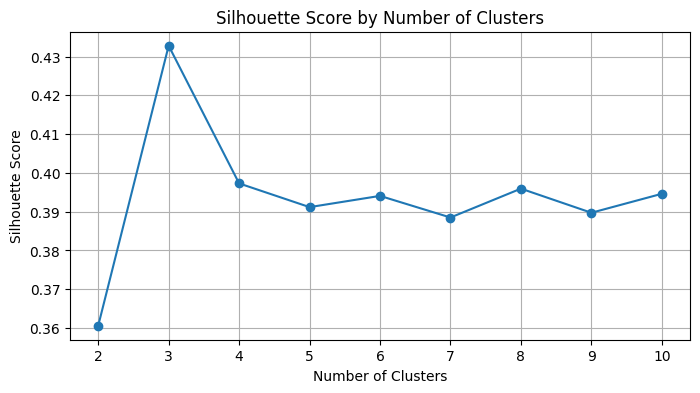

In [7]:
# Identifies the best performing cluster and returns data required for the visualizations
silhouette_scores, best_cluster, best_k = find_best_cluster_count(x_pca, 2, 11)
# Plots the silhouette scores of all the clusters
plot_silhouette_scores(silhouette_scores, 2, 11)

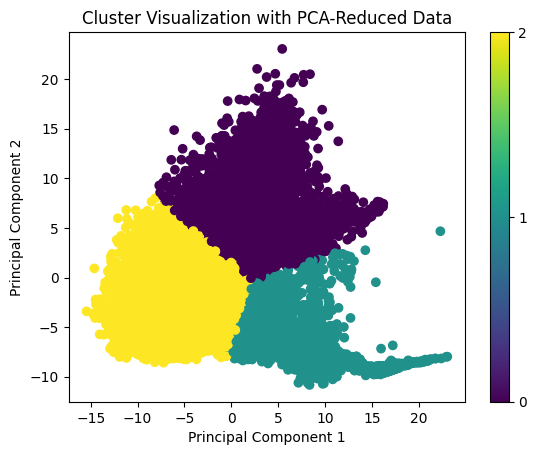

In [8]:
# Plots a scatterplot for the best performing clustering
plot_scatterplot(x_pca, best_cluster, best_k)

### Markdown Answer to Question 3.4 ii)

Utilizing three PCA components for visualization in a 3D space can expose deeper and more intricate relationships among clusters that two-dimensional views might hide. This additional dimension might reveal that clusters overlapping in 2D might be clearly separated along the third axis, offering improved cluster differentiation. The visualization could also more effectively display the clusters' shapes and densities, potentially uncovering smaller subgroups or outliers within larger clusters. However, 3D visualizations are also tougher to interpret due to challenges such as perspective distortions and data points hiding behind each other, which can further complicate the analysis. This approach offers a more comprehensive view of the data's structure but requires careful scrutiny and more advanced visualization tools in order to be interpreted accurately.